# Project - Football Match Prediction Source Code - MLDL Course

## Table of Contents

0. Project Definition
1. Data Collection
2. Data Preprocessing
3. Model Training & Validation
4. Evaluation Matrix Part 1
5. Hyperparameter Optimization
6. Evaluation Matrix Part 2

### 0. Project Definition:

This project is dedicated to leveraging machine learning algorithms to predict the outcomes of soccer matches. By analyzing key statistics for both home and away teams, the project aims to forecast whether a match will result in a Home Win, Away Win, or Draw. This predictive model endeavors to provide accurate insights into match outcomes, utilizing a rich dataset of historical soccer match statistics.

- Model used is logistic regression in a one-vs-rest (OvR)

### 1.0 Data Collection

#### 1.1 Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


#confusion_matrix

#### 1.2 Importing Dataset

In [3]:
df = pd.read_csv('df_full_premierleague.csv', header=0)

df.head(10)

,Unnamed: 0,link_match,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,...,tackles_avg_away,touches_avg_away,yellow_cards_avg_away,goals_scored_ft_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away
0,0,https://www.premierleague.com/match/7186,10/11,2010-11-01,Blackpool,West Bromwich Albion,2-1,1-0,15.0,8.0,...,20.0,584.9,1.6,1.44,1.67,-2.0,0.33,0.78,-4.0,55.6
1,1,https://www.premierleague.com/match/7404,10/11,2011-04-11,Liverpool,Manchester City,3-0,3-0,16.0,6.0,...,22.0,681.4,2.0,1.61,0.87,23.0,0.87,0.32,17.0,60.2
2,2,https://www.premierleague.com/match/7255,10/11,2010-12-13,Manchester United,Arsenal,1-0,1-0,26.0,5.0,...,21.2,748.0,1.8,2.12,1.12,16.0,0.94,0.38,9.0,66.7
3,3,https://www.premierleague.com/match/7126,10/11,2010-09-13,Stoke City,Aston Villa,2-1,0-1,26.0,8.0,...,25.0,567.3,2.0,1.33,2.00,-2.0,1.00,1.00,0.0,66.7
4,4,https://www.premierleague.com/match/7350,10/11,2011-02-14,Fulham,Chelsea,0-0,0-0,50.0,4.0,...,19.4,728.6,1.4,1.84,0.88,24.0,0.84,0.48,9.0,58.7
5,5,https://www.premierleague.com/match/7096,10/11,2010-08-16,Manchester United,Newcastle United,3-0,2-0,15.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,https://www.premierleague.com/match/7166,10/11,2010-10-18,Blackburn Rovers,Sunderland,0-0,0-0,30.0,5.0,...,22.0,554.3,1.4,1.00,1.00,0.0,0.29,0.29,0.0,38.1
7,7,https://www.premierleague.com/match/7258,10/11,2010-12-20,Manchester City,Everton,1-2,0-2,9.0,10.0,...,21.4,630.5,1.3,1.06,1.18,-2.0,0.41,0.65,-4.0,35.3
8,8,https://www.premierleague.com/match/7226,10/11,2010-11-22,Sunderland,Everton,2-2,1-1,44.0,4.0,...,19.8,638.8,1.0,1.08,1.00,1.0,0.38,0.54,-2.0,38.5
9,9,https://www.premierleague.com/match/7106,10/11,2010-08-23,Manchester City,Liverpool,3-0,1-0,24.0,5.0,...,30.0,531.0,1.0,1.00,1.00,0.0,0.00,0.00,0.0,33.3


#### 1.3 Understanding The Dataset

In [4]:
df.describe()

,Unnamed: 0,home_clearances,home_corners,home_fouls_conceded,home_offsides,home_passes,home_possession,home_red_cards,home_shots,home_shots_on_target,...,tackles_avg_away,touches_avg_away,yellow_cards_avg_away,goals_scored_ft_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away
count,4070.000000,4070.000000,4070.000000,4070.000000,4070.000000,4070.000000,4070.000000,4070.000000,4070.000000,4070.000000,...,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000
mean,2034.500000,24.721622,5.945700,10.778624,2.126044,450.428993,51.230393,0.059705,14.545455,4.820885,...,18.256616,643.937879,1.659874,1.378179,1.367018,0.180808,0.609573,0.601326,0.063636,45.921692
std,1175.052127,11.240546,3.136957,3.434517,1.681169,125.676926,11.529756,0.244121,5.768558,2.633621,...,2.804014,90.524897,0.456054,0.595752,0.485221,15.567683,0.326817,0.280908,7.818799,19.579283
min,0.000000,0.000000,0.000000,0.000000,0.000000,176.000000,18.000000,0.000000,0.000000,0.000000,...,5.000000,375.000000,0.000000,0.000000,0.000000,-54.000000,0.000000,0.000000,-26.000000,0.000000
25%,1017.250000,17.000000,4.000000,8.000000,1.000000,360.000000,43.100000,0.000000,10.000000,3.000000,...,16.400000,578.500000,1.400000,1.000000,1.070000,-9.000000,0.410000,0.430000,-5.000000,33.300000
50%,2034.500000,23.000000,6.000000,11.000000,2.000000,433.000000,51.100000,0.000000,14.000000,5.000000,...,18.300000,625.200000,1.700000,1.255000,1.330000,-1.000000,0.550000,0.590000,0.000000,42.900000
75%,3051.750000,31.000000,8.000000,13.000000,3.000000,527.000000,59.600000,0.000000,18.000000,6.000000,...,20.000000,712.325000,1.900000,1.702500,1.640000,7.000000,0.780000,0.750000,3.000000,58.600000
max,4069.000000,73.000000,19.000000,24.000000,11.000000,1015.000000,82.900000,2.000000,44.000000,17.000000,...,34.000000,975.000000,5.000000,6.000000,5.000000,78.000000,4.000000,3.000000,38.000000,100.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4070 entries, 0 to 4069
Columns: 114 entries, Unnamed: 0 to performance_acum_away
dtypes: float64(100), int64(7), object(7)
memory usage: 3.5+ MB


In [6]:
df.shape

(4070, 114)

In [7]:
df.columns.values

array(['Unnamed: 0', 'link_match', 'season', 'date', 'home_team',
       'away_team', 'result_full', 'result_ht', 'home_clearances',
       'home_corners', 'home_fouls_conceded', 'home_offsides',
       'home_passes', 'home_possession', 'home_red_cards', 'home_shots',
       'home_shots_on_target', 'home_tackles', 'home_touches',
       'home_yellow_cards', 'away_clearances', 'away_corners',
       'away_fouls_conceded', 'away_offsides', 'away_passes',
       'away_possession', 'away_red_cards', 'away_shots',
       'away_shots_on_target', 'away_tackles', 'away_touches',
       'away_yellow_cards', 'goal_home_ft', 'goal_away_ft', 'sg_match_ft',
       'goal_home_ht', 'goal_away_ht', 'sg_match_ht', 'clearances_avg_H',
       'corners_avg_H', 'fouls_conceded_avg_H', 'offsides_avg_H',
       'passes_avg_H', 'possession_avg_H', 'red_cards_avg_H',
       'shots_avg_H', 'shots_on_target_avg_H', 'tackles_avg_H',
       'touches_avg_H', 'yellow_cards_avg_H', 'goals_scored_ft_avg_H',
       'go

In [8]:
df.isnull().sum().values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 220,
       220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220,
       220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220,
       220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 110, 110,
       110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110,
       110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110,
       110, 110, 110, 110, 110, 110, 110, 110, 110, 110])

In [9]:
df_keystats = df[['link_match', 'season', 'date', 'home_team', 'away_team', 'result_full', 'sg_match_ft', 'home_clearances', 'home_corners', 'home_fouls_conceded', 'home_offsides', 'home_passes', 'home_possession', 'home_red_cards', 'home_shots', 'home_shots_on_target', 'home_tackles', 'home_touches', 'home_yellow_cards', 'away_clearances', 'away_corners', 'away_fouls_conceded', 'away_offsides', 'away_passes', 'away_possession', 'away_red_cards', 'away_shots', 'away_shots_on_target', 'away_tackles', 'away_touches', 'away_yellow_cards']]
df_keystats.head()

,link_match,season,date,home_team,away_team,result_full,sg_match_ft,home_clearances,home_corners,home_fouls_conceded,...,away_fouls_conceded,away_offsides,away_passes,away_possession,away_red_cards,away_shots,away_shots_on_target,away_tackles,away_touches,away_yellow_cards
0,https://www.premierleague.com/match/7186,10/11,2010-11-01,Blackpool,West Bromwich Albion,2-1,1,15.0,8.0,16.0,...,13.0,3.0,280.0,34.6,2.0,14.0,4.0,15.0,472.0,3.0
1,https://www.premierleague.com/match/7404,10/11,2011-04-11,Liverpool,Manchester City,3-0,3,16.0,6.0,6.0,...,3.0,0.0,465.0,46.9,0.0,12.0,2.0,27.0,687.0,0.0
2,https://www.premierleague.com/match/7255,10/11,2010-12-13,Manchester United,Arsenal,1-0,1,26.0,5.0,9.0,...,17.0,0.0,499.0,53.9,0.0,11.0,5.0,20.0,737.0,4.0
3,https://www.premierleague.com/match/7126,10/11,2010-09-13,Stoke City,Aston Villa,2-1,1,26.0,8.0,12.0,...,14.0,1.0,382.0,56.7,0.0,11.0,5.0,20.0,599.0,2.0
4,https://www.premierleague.com/match/7350,10/11,2011-02-14,Fulham,Chelsea,0-0,0,50.0,4.0,11.0,...,13.0,3.0,580.0,62.6,0.0,25.0,3.0,23.0,837.0,1.0


In [10]:
df_keystats[df_keystats['season']=='14/15'].head(10)

,link_match,season,date,home_team,away_team,result_full,sg_match_ft,home_clearances,home_corners,home_fouls_conceded,...,away_fouls_conceded,away_offsides,away_passes,away_possession,away_red_cards,away_shots,away_shots_on_target,away_tackles,away_touches,away_yellow_cards
1520,https://www.premierleague.com/match/9781,14/15,2014-12-26,Arsenal,Queens Park Rangers,2-1,1,19.0,6.0,6.0,...,15.0,0.0,422.0,44.1,0.0,16.0,2.0,26.0,607.0,4.0
1521,https://www.premierleague.com/match/9782,14/15,2014-12-26,Burnley,Liverpool,0-1,-1,29.0,8.0,7.0,...,5.0,4.0,529.0,52.4,0.0,10.0,3.0,27.0,752.0,1.0
1522,https://www.premierleague.com/match/9783,14/15,2014-12-26,Chelsea,West Ham United,2-0,2,19.0,8.0,8.0,...,14.0,2.0,300.0,35.3,0.0,6.0,0.0,15.0,508.0,3.0
1523,https://www.premierleague.com/match/9784,14/15,2014-12-26,Crystal Palace,Southampton,1-3,-2,20.0,8.0,15.0,...,10.0,2.0,520.0,57.1,0.0,13.0,6.0,23.0,738.0,0.0
1524,https://www.premierleague.com/match/9785,14/15,2014-12-26,Everton,Stoke City,0-1,-1,22.0,9.0,9.0,...,15.0,3.0,333.0,38.1,0.0,12.0,2.0,20.0,564.0,3.0
1525,https://www.premierleague.com/match/9786,14/15,2014-12-26,Leicester City,Tottenham Hotspur,1-2,-1,30.0,11.0,10.0,...,14.0,3.0,457.0,50.4,0.0,8.0,3.0,20.0,681.0,2.0
1526,https://www.premierleague.com/match/9787,14/15,2014-12-26,Manchester United,Newcastle United,3-1,2,23.0,4.0,16.0,...,9.0,1.0,346.0,38.1,0.0,8.0,4.0,13.0,524.0,2.0
1527,https://www.premierleague.com/match/9788,14/15,2014-12-26,Sunderland,Hull City,1-3,-2,19.0,10.0,12.0,...,6.0,0.0,500.0,52.4,0.0,13.0,5.0,14.0,719.0,2.0
1528,https://www.premierleague.com/match/9789,14/15,2014-12-26,Swansea City,Aston Villa,1-0,1,26.0,4.0,17.0,...,12.0,2.0,602.0,56.6,0.0,11.0,3.0,20.0,773.0,4.0
1529,https://www.premierleague.com/match/9790,14/15,2014-12-26,West Bromwich Albion,Manchester City,1-3,-2,17.0,10.0,5.0,...,9.0,4.0,513.0,52.1,0.0,9.0,5.0,21.0,712.0,1.0


##### Creating class label for the match outcome

In [11]:
score = [] 
  
# For each row in the column 
for goals in df_keystats['sg_match_ft']:        
    if goals > 0:                   # positive value means home team won
        score.append('HomeWin') 
    elif goals < 0:                  # negative value means away team won
        score.append("AwayWin") 
    else: 
        score.append("Draw") # 0 value means a draw
  

df_keystats['Result_Class'] = score   

/var/folders/3f/qvvgdt3j7q74m3y4_d9drc080000gn/T/ipykernel_53721/3008818902.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_keystats['Result_Class'] = score


In [12]:
df_keystats.head(10)

,link_match,season,date,home_team,away_team,result_full,sg_match_ft,home_clearances,home_corners,home_fouls_conceded,...,away_offsides,away_passes,away_possession,away_red_cards,away_shots,away_shots_on_target,away_tackles,away_touches,away_yellow_cards,Result_Class
0,https://www.premierleague.com/match/7186,10/11,2010-11-01,Blackpool,West Bromwich Albion,2-1,1,15.0,8.0,16.0,...,3.0,280.0,34.6,2.0,14.0,4.0,15.0,472.0,3.0,HomeWin
1,https://www.premierleague.com/match/7404,10/11,2011-04-11,Liverpool,Manchester City,3-0,3,16.0,6.0,6.0,...,0.0,465.0,46.9,0.0,12.0,2.0,27.0,687.0,0.0,HomeWin
2,https://www.premierleague.com/match/7255,10/11,2010-12-13,Manchester United,Arsenal,1-0,1,26.0,5.0,9.0,...,0.0,499.0,53.9,0.0,11.0,5.0,20.0,737.0,4.0,HomeWin
3,https://www.premierleague.com/match/7126,10/11,2010-09-13,Stoke City,Aston Villa,2-1,1,26.0,8.0,12.0,...,1.0,382.0,56.7,0.0,11.0,5.0,20.0,599.0,2.0,HomeWin
4,https://www.premierleague.com/match/7350,10/11,2011-02-14,Fulham,Chelsea,0-0,0,50.0,4.0,11.0,...,3.0,580.0,62.6,0.0,25.0,3.0,23.0,837.0,1.0,Draw
5,https://www.premierleague.com/match/7096,10/11,2010-08-16,Manchester United,Newcastle United,3-0,3,15.0,5.0,9.0,...,0.0,313.0,34.4,0.0,9.0,4.0,21.0,527.0,2.0,HomeWin
6,https://www.premierleague.com/match/7166,10/11,2010-10-18,Blackburn Rovers,Sunderland,0-0,0,30.0,5.0,12.0,...,2.0,428.0,57.0,0.0,17.0,4.0,10.0,635.0,1.0,Draw
7,https://www.premierleague.com/match/7258,10/11,2010-12-20,Manchester City,Everton,1-2,-1,9.0,10.0,10.0,...,2.0,286.0,31.8,1.0,6.0,2.0,22.0,515.0,1.0,AwayWin
8,https://www.premierleague.com/match/7226,10/11,2010-11-22,Sunderland,Everton,2-2,0,44.0,4.0,6.0,...,5.0,459.0,54.7,0.0,13.0,7.0,23.0,679.0,2.0,Draw
9,https://www.premierleague.com/match/7106,10/11,2010-08-23,Manchester City,Liverpool,3-0,3,24.0,5.0,13.0,...,3.0,400.0,45.6,0.0,17.0,5.0,16.0,603.0,1.0,HomeWin


In [13]:
df_keystats.sg_match_ft.value_counts() 
# This helps to understand the score difference between Home teams and Away Teams
# and identify the outlier data points

 0    1000
 1     844
-1     664
 2     560
-2     328
 3     255
-3     164
 4     109
-4      54
 5      50
-5      18
 6      12
-6       5
 8       3
 7       1
-9       1
-7       1
 9       1
Name: sg_match_ft, dtype: int64

In [14]:
df_keystats.Result_Class.unique()

array(['HomeWin', 'Draw', 'AwayWin'], dtype=object)

#### Drop match info stats

In [15]:
df_match_results = df_keystats.drop(['link_match', 'season', 'date', 'home_team', 'away_team', 'result_full', 'sg_match_ft'], axis=1)
df_match_results

,home_clearances,home_corners,home_fouls_conceded,home_offsides,home_passes,home_possession,home_red_cards,home_shots,home_shots_on_target,home_tackles,...,away_offsides,away_passes,away_possession,away_red_cards,away_shots,away_shots_on_target,away_tackles,away_touches,away_yellow_cards,Result_Class
0,15.0,8.0,16.0,2.0,550.0,65.4,0.0,26.0,5.0,19.0,...,3.0,280.0,34.6,2.0,14.0,4.0,15.0,472.0,3.0,HomeWin
1,16.0,6.0,6.0,5.0,527.0,53.1,0.0,21.0,5.0,31.0,...,0.0,465.0,46.9,0.0,12.0,2.0,27.0,687.0,0.0,HomeWin
2,26.0,5.0,9.0,3.0,430.0,46.1,0.0,17.0,6.0,27.0,...,0.0,499.0,53.9,0.0,11.0,5.0,20.0,737.0,4.0,HomeWin
3,26.0,8.0,12.0,2.0,277.0,43.3,0.0,21.0,9.0,16.0,...,1.0,382.0,56.7,0.0,11.0,5.0,20.0,599.0,2.0,HomeWin
4,50.0,4.0,11.0,1.0,333.0,37.4,0.0,13.0,5.0,32.0,...,3.0,580.0,62.6,0.0,25.0,3.0,23.0,837.0,1.0,Draw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,15.0,5.0,12.0,0.0,697.0,63.4,0.0,11.0,1.0,12.0,...,3.0,404.0,36.6,0.0,13.0,4.0,13.0,590.0,0.0,AwayWin
4066,13.0,5.0,6.0,3.0,351.0,38.9,0.0,12.0,7.0,8.0,...,2.0,571.0,61.1,0.0,16.0,4.0,9.0,746.0,2.0,Draw
4067,25.0,4.0,4.0,1.0,353.0,37.0,0.0,8.0,2.0,19.0,...,2.0,600.0,63.0,0.0,11.0,1.0,6.0,781.0,0.0,Draw
4068,47.0,2.0,13.0,1.0,263.0,28.2,1.0,9.0,2.0,13.0,...,1.0,641.0,71.8,0.0,16.0,4.0,9.0,838.0,0.0,HomeWin


In [16]:
df_match_results.isnull().sum()

home_clearances         0
home_corners            0
home_fouls_conceded     0
home_offsides           0
home_passes             0
home_possession         0
home_red_cards          0
home_shots              0
home_shots_on_target    0
home_tackles            0
home_touches            0
home_yellow_cards       0
away_clearances         0
away_corners            0
away_fouls_conceded     0
away_offsides           0
away_passes             0
away_possession         0
away_red_cards          0
away_shots              0
away_shots_on_target    0
away_tackles            0
away_touches            0
away_yellow_cards       0
Result_Class            0
dtype: int64

#### Multi-Class Imbalance Check

HomeWin    1835
AwayWin    1235
Draw       1000
Name: Result_Class, dtype: int64


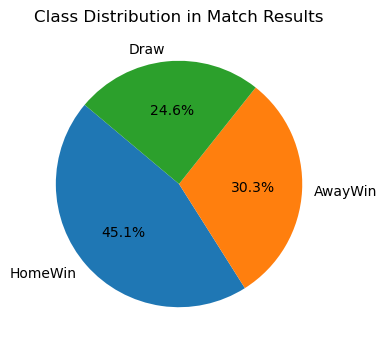

In [17]:
class_counts = df_keystats['Result_Class'].value_counts()
print(class_counts)

# Plotting
plt.figure(figsize=(4, 4))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution in Match Results')
plt.show()


#### Converting Class Output to Values

In [18]:
# The Target column Result_Class has values 'HomeWin', 'AwayWin', and 'Draw'
# We need to convert it to int for the ML algorithm

le = LabelEncoder()

df_match_results["Result_Class"] = le.fit_transform(df_match_results["Result_Class"])
df_match_results

,home_clearances,home_corners,home_fouls_conceded,home_offsides,home_passes,home_possession,home_red_cards,home_shots,home_shots_on_target,home_tackles,...,away_offsides,away_passes,away_possession,away_red_cards,away_shots,away_shots_on_target,away_tackles,away_touches,away_yellow_cards,Result_Class
0,15.0,8.0,16.0,2.0,550.0,65.4,0.0,26.0,5.0,19.0,...,3.0,280.0,34.6,2.0,14.0,4.0,15.0,472.0,3.0,2
1,16.0,6.0,6.0,5.0,527.0,53.1,0.0,21.0,5.0,31.0,...,0.0,465.0,46.9,0.0,12.0,2.0,27.0,687.0,0.0,2
2,26.0,5.0,9.0,3.0,430.0,46.1,0.0,17.0,6.0,27.0,...,0.0,499.0,53.9,0.0,11.0,5.0,20.0,737.0,4.0,2
3,26.0,8.0,12.0,2.0,277.0,43.3,0.0,21.0,9.0,16.0,...,1.0,382.0,56.7,0.0,11.0,5.0,20.0,599.0,2.0,2
4,50.0,4.0,11.0,1.0,333.0,37.4,0.0,13.0,5.0,32.0,...,3.0,580.0,62.6,0.0,25.0,3.0,23.0,837.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,15.0,5.0,12.0,0.0,697.0,63.4,0.0,11.0,1.0,12.0,...,3.0,404.0,36.6,0.0,13.0,4.0,13.0,590.0,0.0,0
4066,13.0,5.0,6.0,3.0,351.0,38.9,0.0,12.0,7.0,8.0,...,2.0,571.0,61.1,0.0,16.0,4.0,9.0,746.0,2.0,1
4067,25.0,4.0,4.0,1.0,353.0,37.0,0.0,8.0,2.0,19.0,...,2.0,600.0,63.0,0.0,11.0,1.0,6.0,781.0,0.0,1
4068,47.0,2.0,13.0,1.0,263.0,28.2,1.0,9.0,2.0,13.0,...,1.0,641.0,71.8,0.0,16.0,4.0,9.0,838.0,0.0,2


- HomeWin = 2
- AwayWin = 0
- Draw = 1

#### Feature Selection

###### Correlation Analysis

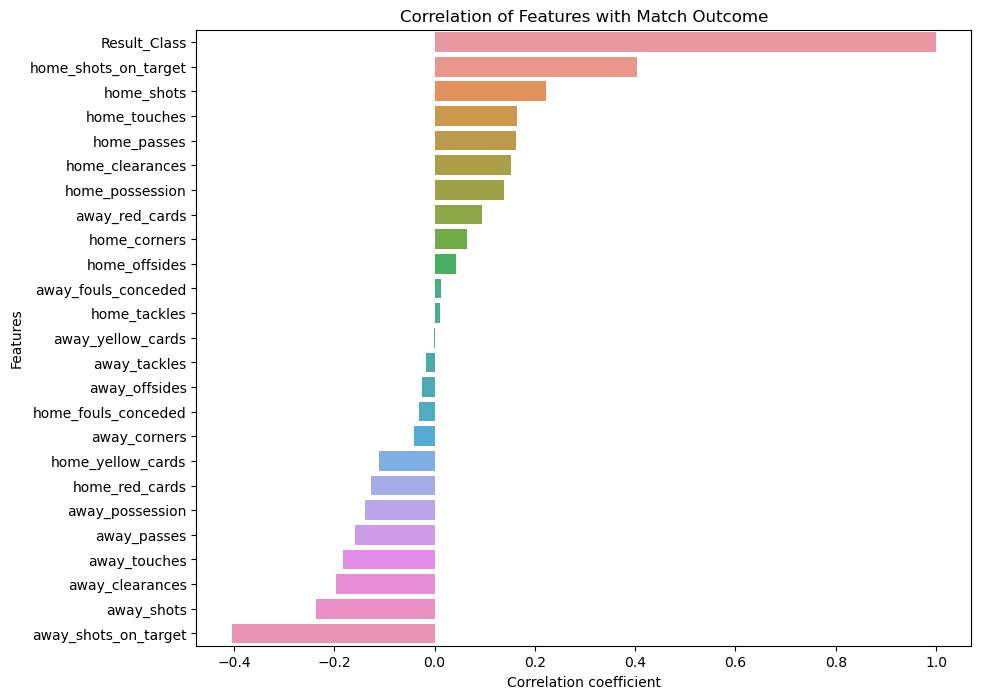

Feature Correlation With Target Class
 Result_Class            1.000000
home_shots_on_target    0.403730
home_shots              0.222558
home_touches            0.164110
home_passes             0.161833
home_clearances         0.151948
home_possession         0.138941
away_red_cards          0.095142
home_corners            0.064851
home_offsides           0.042245
away_fouls_conceded     0.013011
home_tackles            0.011569
away_yellow_cards      -0.001854
away_tackles           -0.017012
away_offsides          -0.024582
home_fouls_conceded    -0.030610
away_corners           -0.040911
home_yellow_cards      -0.111735
home_red_cards         -0.126807
away_possession        -0.138941
away_passes            -0.158001
away_touches           -0.182177
away_clearances        -0.196834
away_shots             -0.237346
away_shots_on_target   -0.404998
Name: Result_Class, dtype: float64


In [19]:
# Compute the correlation matrix
correlation_matrix = df_match_results.corr()

# Focus on the correlation of features with the target variable 'Result_Class'
correlation_with_target = correlation_matrix['Result_Class'].sort_values(ascending=False)

# Plot the correlations with the target variable
plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index)
plt.title("Correlation of Features with Match Outcome")
plt.xlabel("Correlation coefficient")
plt.ylabel("Features")
plt.show()

print('Feature Correlation With Target Class\n',correlation_with_target)


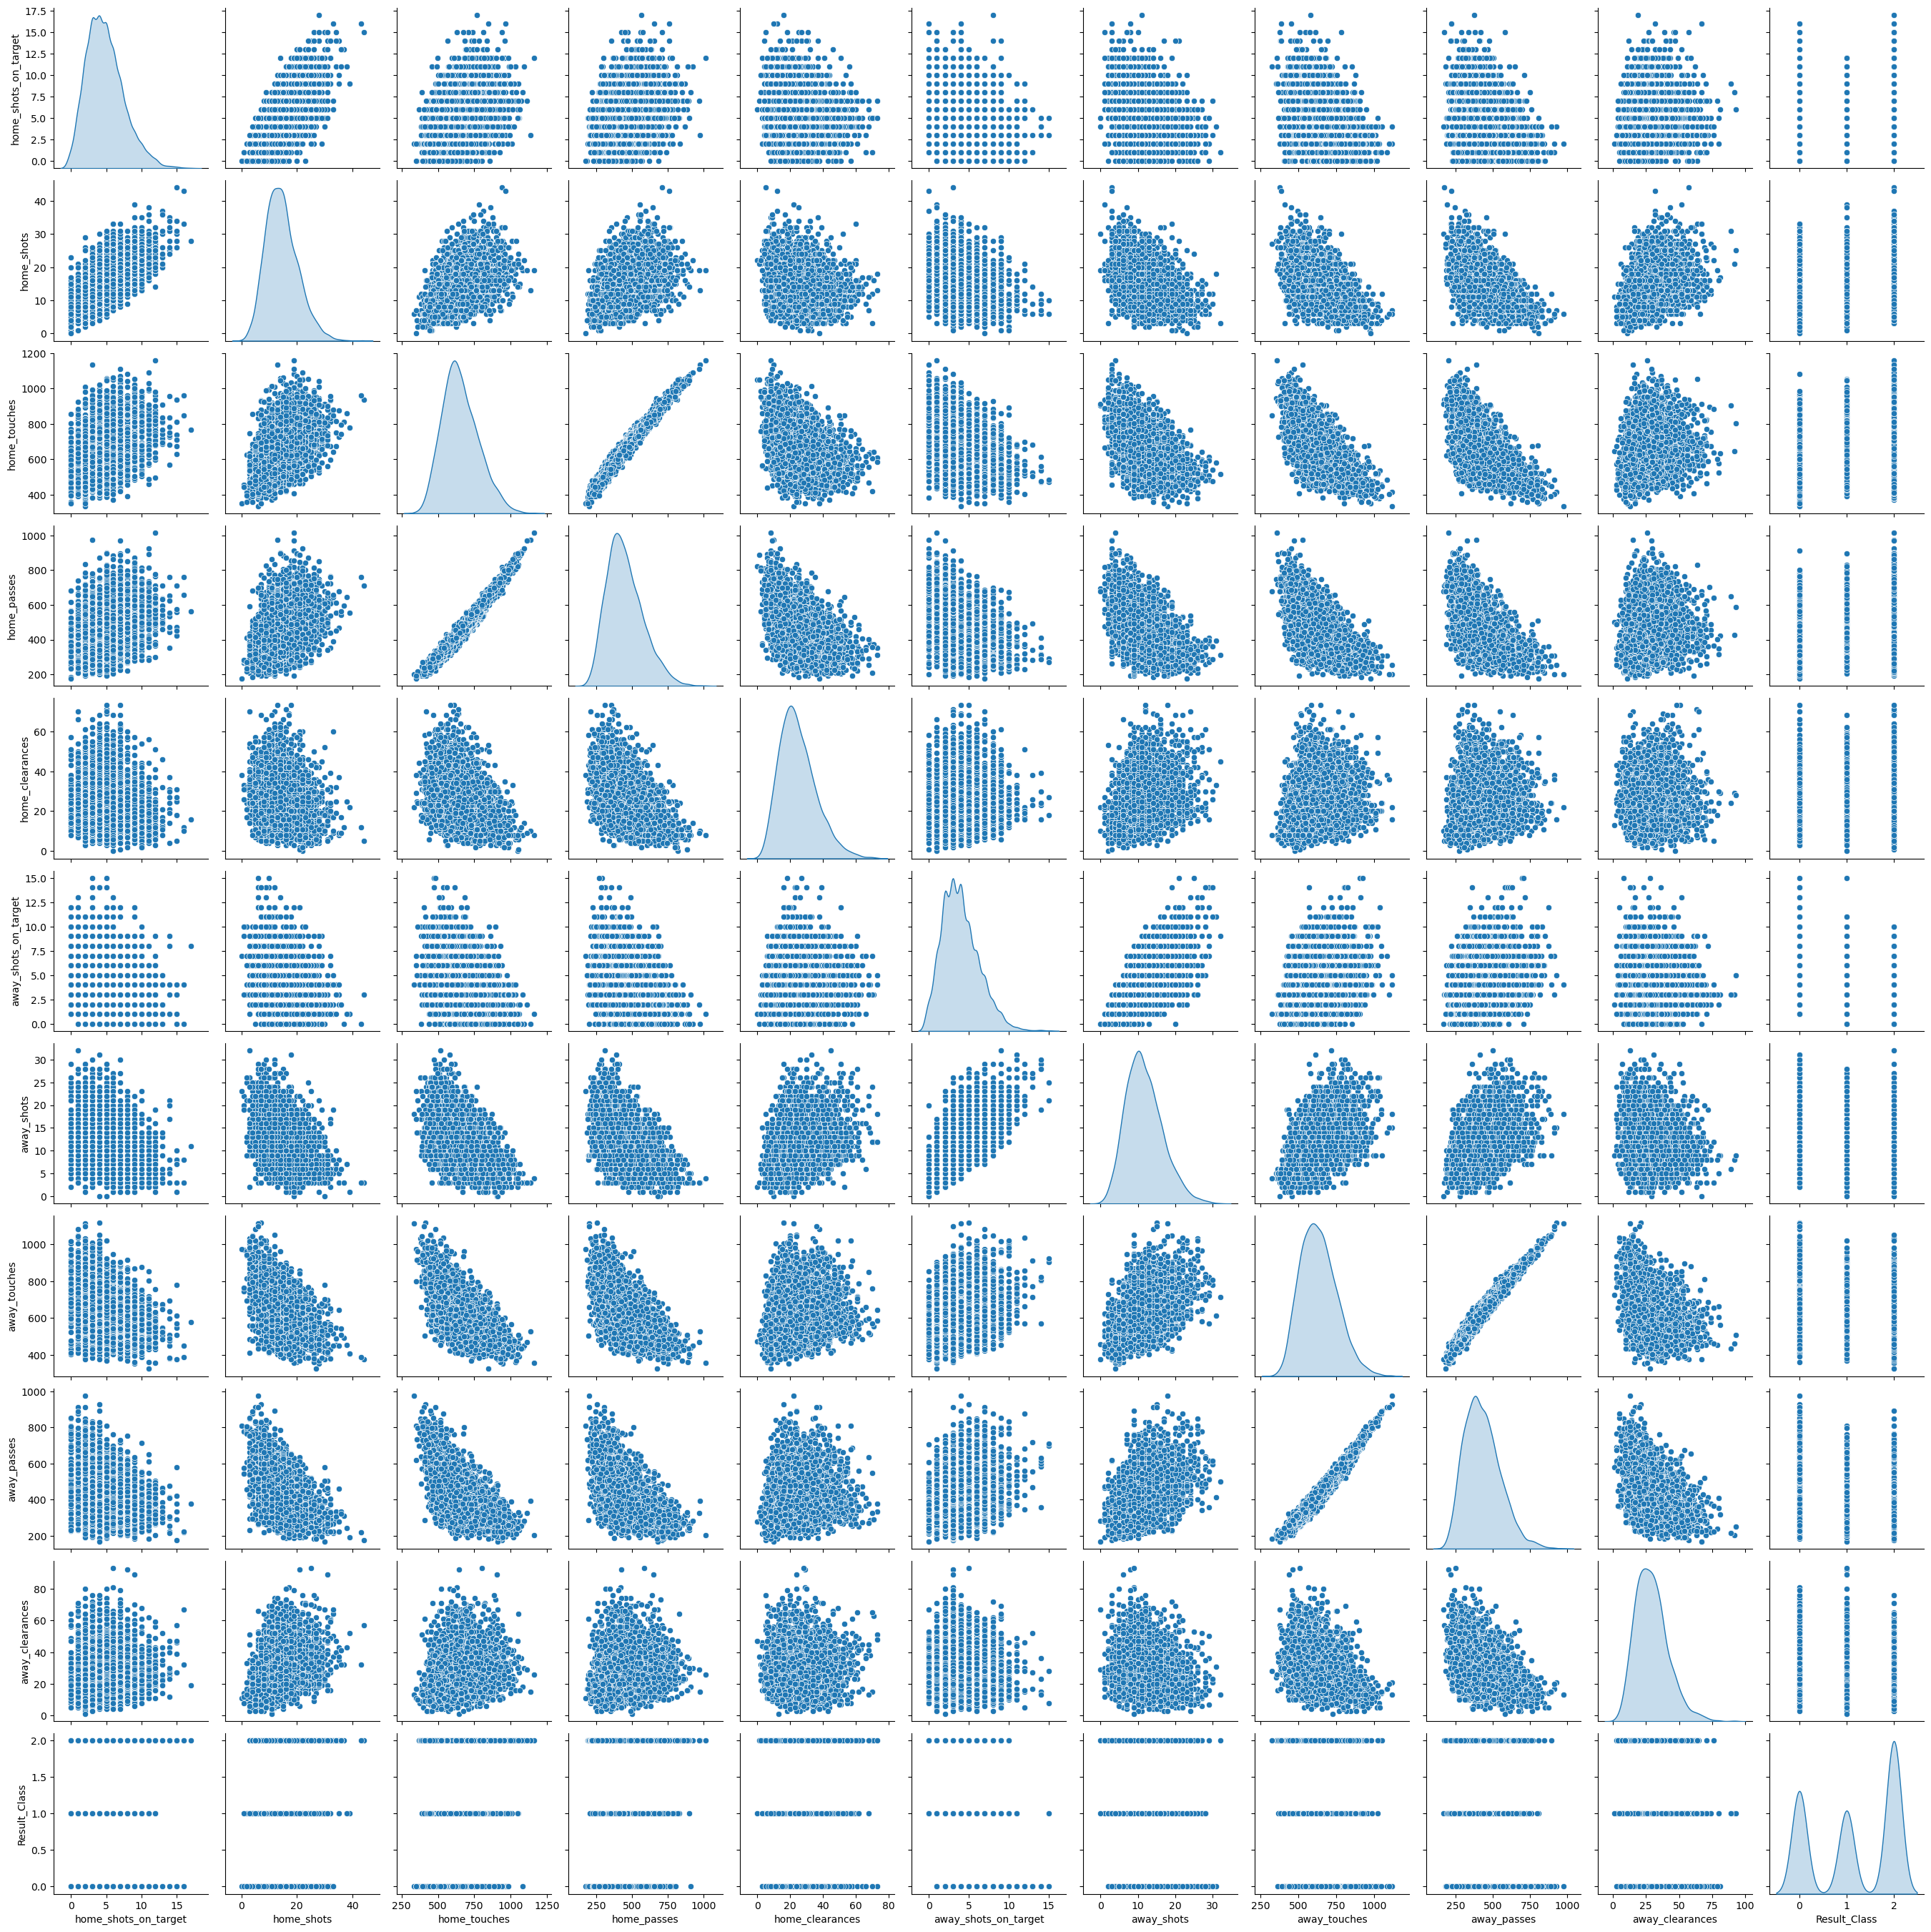

In [20]:
pair_plot_columns = df_match_results[['home_shots_on_target','home_shots', 'home_touches', 'home_passes', 'home_clearances',
       'away_shots_on_target', 'away_shots', 'away_touches', 'away_passes','away_clearances', 'Result_Class']]
sns.pairplot(data=pair_plot_columns, diag_kind='kde')
plt.show()

##### Univariate Selection Method: ANOVA F-test

In [21]:
# Selecting features and target variable
X = df_match_results.drop('Result_Class', axis=1)
y = df_match_results['Result_Class']

# Applying SelectKBest class to extract top 10 best features using ANOVA F-test
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X,y)

# Creating DataFrame to display feature scores
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concatenating two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  # Naming the dataframe columns
top_features = featureScores.nlargest(10,'Score')  # Print 10 best features
top_features

,Feature,Score
20,away_shots_on_target,424.520722
8,home_shots_on_target,416.992290
19,away_shots,123.084029
7,home_shots,106.010608
12,away_clearances,100.225227
22,away_touches,78.687363
16,away_passes,65.536420
4,home_passes,58.907153
10,home_touches,57.620596
0,home_clearances,54.258889


- The score of each feature indicates the strength of the relationship between the feature and the match outcome. Features with higher scores show significant influence on the outcome.

#### Checking Outliers - Box Plots

In [22]:
# Selecting the most impactful features on the target class

df_final = df_match_results[['home_shots_on_target','home_shots','home_touches','home_passes','home_clearances','away_shots_on_target','away_shots','away_touches','away_passes','away_clearances','Result_Class']]
df_final

,home_shots_on_target,home_shots,home_touches,home_passes,home_clearances,away_shots_on_target,away_shots,away_touches,away_passes,away_clearances,Result_Class
0,5.0,26.0,740.0,550.0,15.0,4.0,14.0,472.0,280.0,25.0,2
1,5.0,21.0,750.0,527.0,16.0,2.0,12.0,687.0,465.0,17.0,2
2,6.0,17.0,635.0,430.0,26.0,5.0,11.0,737.0,499.0,33.0,2
3,9.0,21.0,495.0,277.0,26.0,5.0,11.0,599.0,382.0,49.0,2
4,5.0,13.0,576.0,333.0,50.0,3.0,25.0,837.0,580.0,21.0,1
...,...,...,...,...,...,...,...,...,...,...,...
4065,1.0,11.0,886.0,697.0,15.0,4.0,13.0,590.0,404.0,29.0,0
4066,7.0,12.0,522.0,351.0,13.0,4.0,16.0,746.0,571.0,31.0,1
4067,2.0,8.0,544.0,353.0,25.0,1.0,11.0,781.0,600.0,11.0,1
4068,2.0,9.0,443.0,263.0,47.0,4.0,16.0,838.0,641.0,9.0,2


#### Feature Scaling

In [23]:
# Separate features and target
X = df_final.drop('Result_Class', axis=1) # Assigning features to X
y = df_final['Result_Class'] # Assigning class label to y

# Initialize a scaler
scaler = MinMaxScaler()

# Fit and transform the feature data
final_features_scaled = scaler.fit_transform(X)
df_final_scaled = pd.DataFrame(final_features_scaled, columns=X.columns, index=X.index)
df_final_scaled['Result_Class'] = y

#df_final_scaled['Result_Class'] = y
#df_final_features_scaled

df_final_scaled


,home_shots_on_target,home_shots,home_touches,home_passes,home_clearances,away_shots_on_target,away_shots,away_touches,away_passes,away_clearances,Result_Class
0,0.294118,0.590909,0.490291,0.445769,0.205479,0.266667,0.43750,0.186869,0.137546,0.260870,2
1,0.294118,0.477273,0.502427,0.418355,0.219178,0.133333,0.37500,0.458333,0.366791,0.173913,2
2,0.352941,0.386364,0.362864,0.302741,0.356164,0.333333,0.34375,0.521465,0.408922,0.347826,2
3,0.529412,0.477273,0.192961,0.120381,0.356164,0.333333,0.34375,0.347222,0.263941,0.521739,2
4,0.294118,0.295455,0.291262,0.187128,0.684932,0.200000,0.78125,0.647727,0.509294,0.217391,1
...,...,...,...,...,...,...,...,...,...,...,...
4065,0.058824,0.250000,0.667476,0.620977,0.205479,0.266667,0.40625,0.335859,0.291202,0.304348,0
4066,0.411765,0.272727,0.225728,0.208582,0.178082,0.266667,0.50000,0.532828,0.498141,0.326087,1
4067,0.117647,0.181818,0.252427,0.210965,0.342466,0.066667,0.34375,0.577020,0.534077,0.108696,1
4068,0.117647,0.204545,0.129854,0.103695,0.643836,0.266667,0.50000,0.648990,0.584882,0.086957,2


#### Checking Outliers - Box Plots

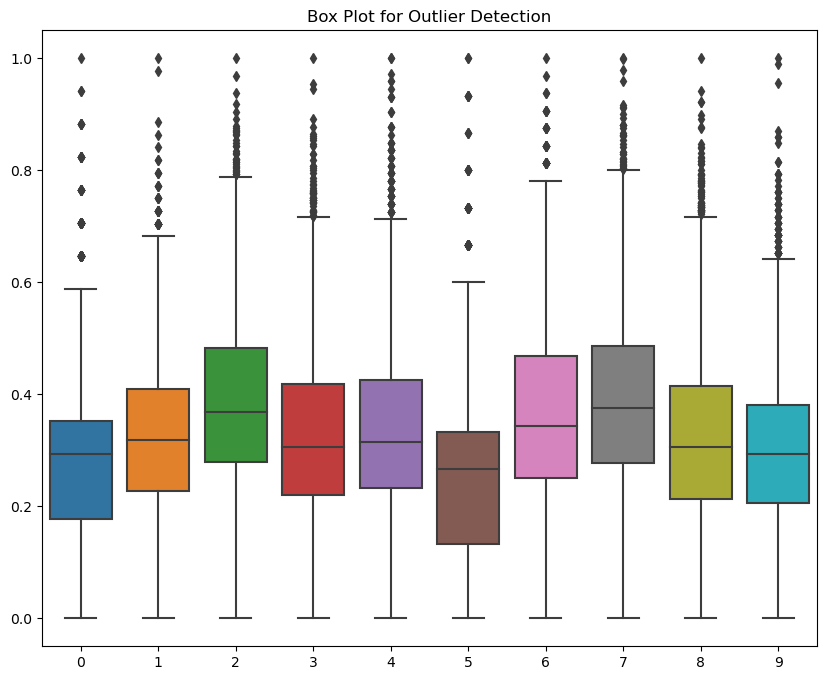

In [24]:
plt.figure(figsize=(10, 8))
plt.title('Box Plot for Outlier Detection')
sns.boxplot(data=final_features_scaled)

plt.show()

- home_shots_on_target: 29 outliers
- home_shots: 26 outliers
- home_touches: 17 outliers
- home_passes: 21 outliers
- home_clearances: 33 outliers

- away_shots_on_target: 36 outliers
- away_shots: 24 outliers
- away_touches: 19 outliers
- away_passes: 32 outliers
- away_clearances: 36 outliers

In [25]:
# Function to detect outliers using IQR
def detect_outliers(df_final_scaled, features):
    outlier_indices = []
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df_final_scaled[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df_final_scaled[col], 75)
        # IQR
        IQR = Q3 - Q1

        # Outlier step
        outlier_step = 1.5 * IQR

        # To Determine a list of indices of outliers for feature col
        outlier_list_col = df_final_scaled[(df_final_scaled[col] < Q1 - outlier_step) | (df_final_scaled[col] > Q3 + outlier_step)].index
        
        # Append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)

    # Select observations containing more than 2 outliers
    outlier_indices = list(set(outlier_indices))
    return outlier_indices

# Features to check for outliers (excluding the target variable)
feature_cols = df_final_scaled.columns[:-1]

# Detect outliers
outlier_indices = detect_outliers(df_final_scaled, feature_cols)

# Show outliers
outliers = df_final_scaled.loc[outlier_indices]
outliers_count = len(outliers)
outliers.head(), outliers_count


(      home_shots_on_target  home_shots  home_touches  home_passes  \
 2052              0.411765    0.363636      0.308252     0.219309   
 2053              0.705882    0.477273      0.516990     0.471990   
 7                 0.411765    0.750000      0.603155     0.523242   
 13                0.176471    0.181818      0.169903     0.122765   
 17                0.058824    0.159091      0.328883     0.281287   
 
       home_clearances  away_shots_on_target  away_shots  away_touches  \
 2052         0.273973              0.800000     0.84375      0.578283   
 2053         0.109589              0.266667     0.31250      0.295455   
 7            0.123288              0.133333     0.18750      0.241162   
 13           0.452055              0.733333     0.59375      0.405303   
 17           0.301370              0.733333     0.59375      0.388889   
 
       away_passes  away_clearances  Result_Class  
 2052     0.449814         0.489130             0  
 2053     0.215613         0

#### Dealing with Outliers

In [26]:
# Remove outliers from the dataset
df_cleaned = df_final_scaled.drop(outlier_indices)

# Shape of the dataset before and after removing outliers
original_shape = df_final_scaled.shape
cleaned_shape = df_cleaned.shape

original_shape, cleaned_shape

((4070, 11), (3585, 11))

#### Dataset Splitting

In [27]:
# Splitting the dataset into features and target label
X = df_cleaned.drop('Result_Class', axis=1)
y = df_cleaned['Result_Class']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3.0 Model Training & Prediction

In [30]:
# Initialize logistic regression model using one-versus-rest method
logreg = LogisticRegression(multi_class='ovr', random_state=42)

# Train the model
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

### 4.0 Evaluation Matrix Part 1

In [31]:
# Calculate accuracy and generate classification report
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

accuracy

0.6094839609483961

In [32]:
class_report

{'0': {'precision': 0.603448275862069,
  'recall': 0.625,
  'f1-score': 0.6140350877192983,
  'support': 224.0},
 '1': {'precision': 0.5106382978723404,
  'recall': 0.13559322033898305,
  'f1-score': 0.21428571428571427,
  'support': 177.0},
 '2': {'precision': 0.6232876712328768,
  'recall': 0.8639240506329114,
  'f1-score': 0.7241379310344828,
  'support': 316.0},
 'accuracy': 0.6094839609483961,
 'macro avg': {'precision': 0.5791247483224287,
  'recall': 0.5415057569906315,
  'f1-score': 0.5174862443464985,
  'support': 717.0},
 'weighted avg': {'precision': 0.589280748432492,
  'recall': 0.6094839609483961,
  'f1-score': 0.5638772904945478,
  'support': 717.0}}

In [33]:
# Convert classification report to DataFrame for better readability
class_report_df = pd.DataFrame(class_report).transpose()

class_report_df

,precision,recall,f1-score,support
0,0.603448,0.625000,0.614035,224.000000
1,0.510638,0.135593,0.214286,177.000000
2,0.623288,0.863924,0.724138,316.000000
accuracy,0.609484,0.609484,0.609484,0.609484
macro avg,0.579125,0.541506,0.517486,717.000000
weighted avg,0.589281,0.609484,0.563877,717.000000


### 5.0 Hyperparameter Optimization

##### Grid Search HPO

In [34]:
%%time
# Defining the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'penalty': ['l1', 'l2'],
    'max_iter': [1000]
}

# Creating a GridSearchCV object
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=0)

# Performing grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# -------------------------------------------------------------



CPU times: user 16.5 s, sys: 1.23 s, total: 17.8 s
Wall time: 16 s


/Users/mohamednouhsaid/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
90 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mohamednouhsaid/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mohamednouhsaid/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mohamednouhsaid/anaconda3/lib/python3.11/site-

##### Solving the above incompatibility between certain solvers and penalty types in logistic regression.

In [35]:
%%time
# Defining separate parameter grids for compatible solver and penalty combinations
param_grid_liblinear = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear'],
    'penalty': ['l1', 'l2'],
    'max_iter': [1000]
}

param_grid_others = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'penalty': ['l2'],
    'max_iter': [1000]
}

# Combining the parameter grids
param_grid_combined = [param_grid_liblinear, param_grid_others]

# Creating a GridSearchCV object with the combined parameter grid
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid_combined, cv=5, scoring='accuracy', verbose=0)

# Performing grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

CPU times: user 14.3 s, sys: 721 ms, total: 15 s
Wall time: 15.3 s


In [36]:
best_params

{'C': 1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}

In [37]:
best_score #It seems the compatibility error is eliminated but at the cost of slightly lower best score.

0.6262309137676269

#### Randomized Search HPO

In [38]:
%%time
# The parameter grid for RandomizedSearchCV
param_dist = {
    'C': np.logspace(-4, 4, 20),  # Regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Algorithms to use in the optimization
    'max_iter': [1000]
}

# RandomizedSearchCV with Logistic Regression model
random_search = RandomizedSearchCV(LogisticRegression(multi_class='ovr', random_state=0), param_distributions=param_dist, 
                                   n_iter=10, cv=5, scoring='accuracy', random_state=0)

# Fitting to the data
random_search.fit(X_train, y_train)

# Best parameters and best score
best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

#'penalty': ['l1', 'l2'] Adding penalty parameter in in combined_parameter approach does not increase 
# the likelihood of improved best_score_random

CPU times: user 3.66 s, sys: 367 ms, total: 4.02 s
Wall time: 3.68 s


In [39]:
best_params_random

{'solver': 'newton-cg', 'max_iter': 1000, 'C': 4.281332398719396}

In [40]:
best_score_random

0.6283227222698555

### 6.0 Evaluation Matrix Part 2

In [41]:
# Comparing Prediction accuracy after HPO and selecting the best accuracy

best_score_random

0.6283227222698555

In [44]:
improvement = best_score_random - accuracy
improvement

0.018838761321459452

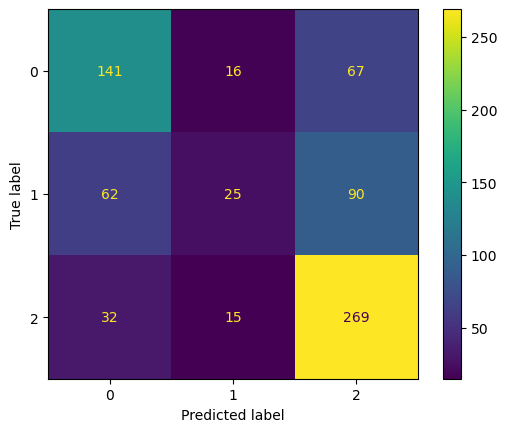

In [45]:
ConfusionMatrixDisplay.from_estimator(random_search, X_test, y_test)

#### SOURCE CODE END ####